In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
image_path = os.path.join("../images", "morphological.png")
image = cv2.imread(image_path)
image_rbg = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# function to display the image
def show_image(title,img,cmap=None):
    plt.figure(figsize=(3,3))
    plt.imshow(img,cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

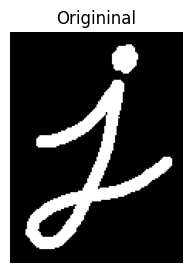

In [3]:
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
show_image("Origininal",gray_image,cmap="gray") 


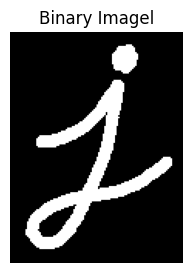

In [4]:
_,binary_image = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)    
show_image("Binary Imagel",binary_image,cmap="gray")

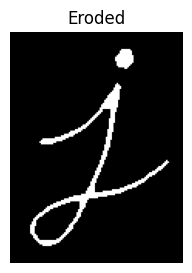

In [5]:
kernel = np.ones((5,5),np.uint8)  
eroded_image = cv2.erode(binary_image,kernel,iterations=1) 
show_image("Eroded", eroded_image,cmap="gray") 

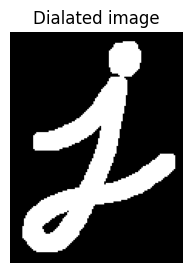

In [6]:
dialted_image = cv2.dilate(binary_image,kernel,iterations=1) 
show_image("Dialated image",dialted_image,cmap="gray") 

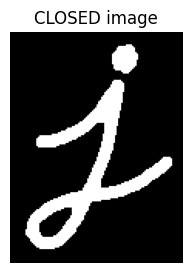

In [7]:
closed_image = cv2.morphologyEx(binary_image,cv2.MORPH_CLOSE,kernel) 
show_image("CLOSED image",closed_image,cmap="gray") 

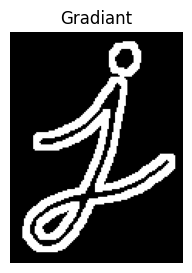

In [8]:
gradient_image = cv2.morphologyEx(binary_image,cv2.MORPH_GRADIENT,kernel) 
show_image("Gradiant",gradient_image,cmap="gray") 

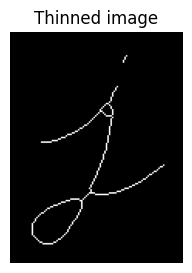

In [13]:
from skimage.morphology import thin 
thinned_image = thin(binary_image)
show_image("Thinned image",thinned_image,cmap="gray") 

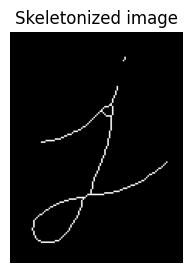

In [14]:
from skimage.morphology import skeletonize 
skeleton = skeletonize(binary_image)
show_image("Skeletonized image",skeleton,cmap="gray") 

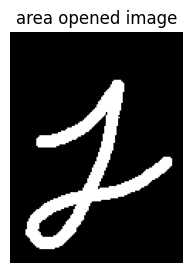

In [20]:
from skimage.morphology import remove_small_objects
area_opened_image = remove_small_objects(binary_image.astype(bool),min_size=500)*255
show_image("area opened image",area_opened_image,cmap="gray")

In [21]:
print(cv2.dilate)

<built-in function dilate>


In [22]:
print(cv2.dilate.__doc__)


dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst
.   @brief Dilates an image by using a specific structuring element.
.   
.   The function dilates the source image using the specified structuring element that determines the
.   shape of a pixel neighborhood over which the maximum is taken:
.   \f[\texttt{dst} (x,y) =  \max _{(x',y'):  \, \texttt{element} (x',y') \ne0 } \texttt{src} (x+x',y+y')\f]
.   
.   The function supports the in-place mode. Dilation can be applied several ( iterations ) times. In
.   case of multi-channel images, each channel is processed independently.
.   
.   @param src input image; the number of channels can be arbitrary, but the depth should be one of
.   CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
.   @param dst output image of the same size and type as src.
.   @param kernel structuring element used for dilation; if element=Mat(), a 3 x 3 rectangular
.   structuring element is used. Kernel can be created using #getStructu

In [31]:
def logical_and(img1, img2):
    rows, cols = img1.shape
    output = [[img1[i][j] & img2[i][j] for j in range(cols)] for i in range(rows)]
    return np.array(output)

def logical_or(img1, img2):
    rows, cols = img1.shape
    output = [[img1[i][j] | img2[i][j] for j in range(cols)] for i in range(rows)]
    return np.array(output)

def logical_xor(img1, img2):
    rows, cols = img1.shape
    output = [[img1[i][j] ^ img2[i][j] for j in range(cols)] for i in range(rows)]
    return np.array(output)

def logical_not(img):
    rows, cols = img.shape
    output = [[1 - img[i][j] for j in range(cols)] for i in range(rows)]
    return np.array(output)

# Example Usage
img1 = np.array([[0, 1], [1, 0]])
img2 = np.array([[1, 1], [0, 0]])

print("AND:\n", logical_and(img1, img2))
print("OR:\n", logical_or(img1, img2))
print("XOR:\n", logical_xor(img1, img2))
print("NOT img1:\n", logical_not(img1))


AND:
 [[0 1]
 [0 0]]
OR:
 [[1 1]
 [1 0]]
XOR:
 [[1 0]
 [1 0]]
NOT img1:
 [[1 0]
 [0 1]]


In [ ]:
import numpy as np

def erosion(image, kernel):
    rows, cols = image.shape
    k_rows, k_cols = kernel.shape
    pad_x, pad_y = k_rows // 2, k_cols // 2
    output = np.zeros_like(image)

    for i in range(pad_x, rows - pad_x):
        for j in range(pad_y, cols - pad_y):
            if np.all(image[i - pad_x:i + pad_x + 1, j - pad_y:j + pad_y + 1] * kernel == kernel):
                output[i, j] = 1
    return output

def dilation(image, kernel):
    rows, cols = image.shape
    k_rows, k_cols = kernel.shape
    pad_x, pad_y = k_rows // 2, k_cols // 2
    output = np.zeros_like(image)

    for i in range(pad_x, rows - pad_x):
        for j in range(pad_y, cols - pad_y):
            if np.any(image[i - pad_x:i + pad_x + 1, j - pad_y:j + pad_y + 1] * kernel):
                output[i, j] = 1
    return output

# Example Usage
image = np.array([[0, 0, 1, 0, 0], 
                  [0, 1, 1, 1, 0], 
                  [1, 1, 1, 1, 1], 
                  [0, 1, 1, 1, 0], 
                  [0, 0, 1, 0, 0]])

kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

eroded_img = erosion(image, kernel)
dilated_img = dilation(image, kernel)

print("Eroded Image:\n", eroded_img)
print("Dilated Image:\n", dilated_img)